In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('C:/Users/Scholar/Downloads/archive (3)/diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale (optional for tree models, but kept for uniformity)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)

    print(f"‚úÖ Accuracy: {accuracy:.3f}")
    print(f"üìà Sensitivity (Recall): {sensitivity:.3f}")
    print(f"üìâ Specificity: {specificity:.3f}")
    return accuracy, sensitivity, specificity


‚úÖ Accuracy: 0.753
üìà Sensitivity (Recall): 0.673
üìâ Specificity: 0.798


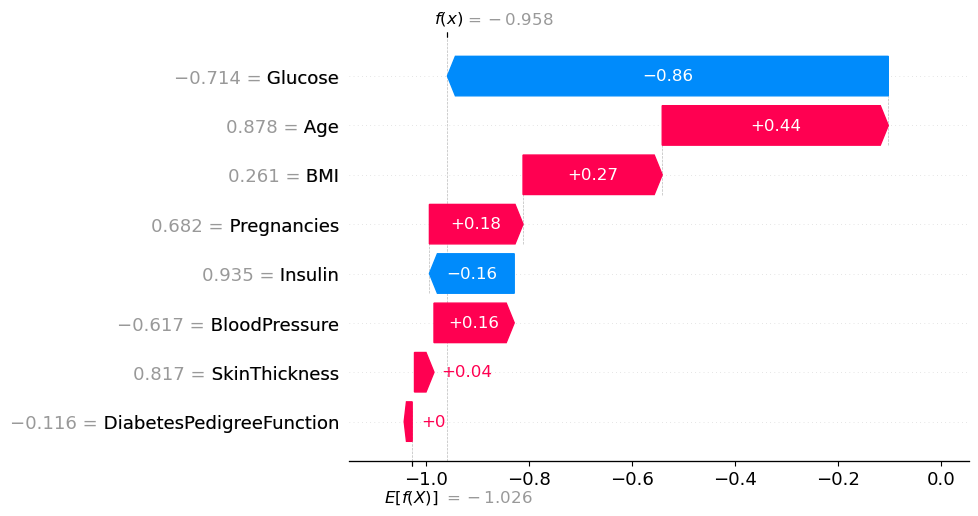

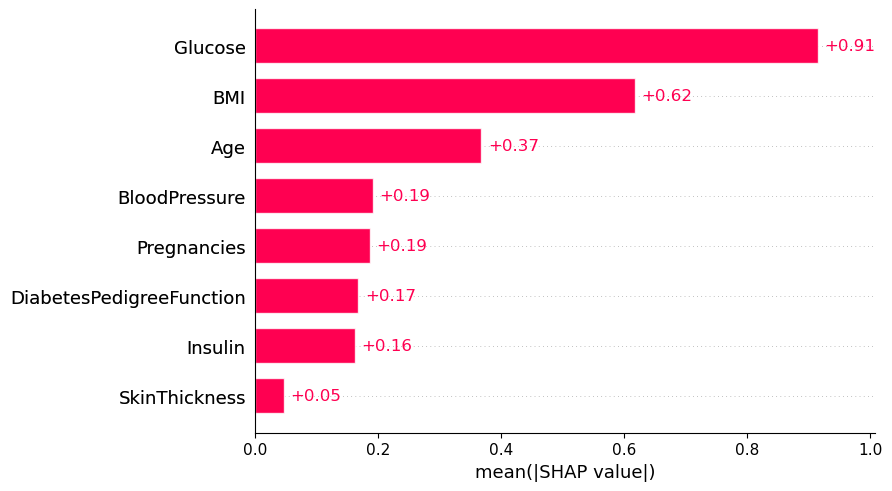

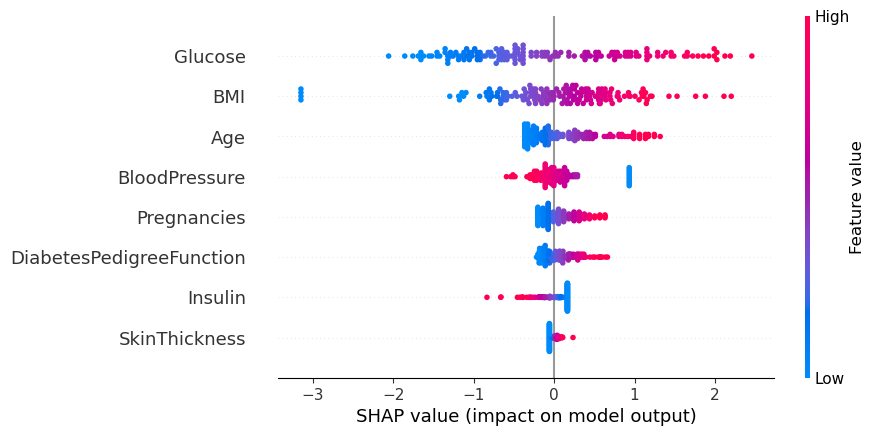

In [8]:
from sklearn.linear_model import LogisticRegression
import shap

# Train Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_lr = model_lr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr)

# SHAP
explainer_lr = shap.Explainer(model_lr, X_train_scaled)
shap_values_lr = explainer_lr(X_test_scaled)

# SHAP Visualizations
sample_index = 0
shap.initjs()
shap.plots.waterfall(shap_values_lr[sample_index])
shap.plots.bar(shap_values_lr)
shap.plots.beeswarm(shap_values_lr)
shap.plots.force(shap_values_lr[0])

C:\Users\Scholar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


‚úÖ Accuracy: 0.721
üìà Sensitivity (Recall): 0.709
üìâ Specificity: 0.727


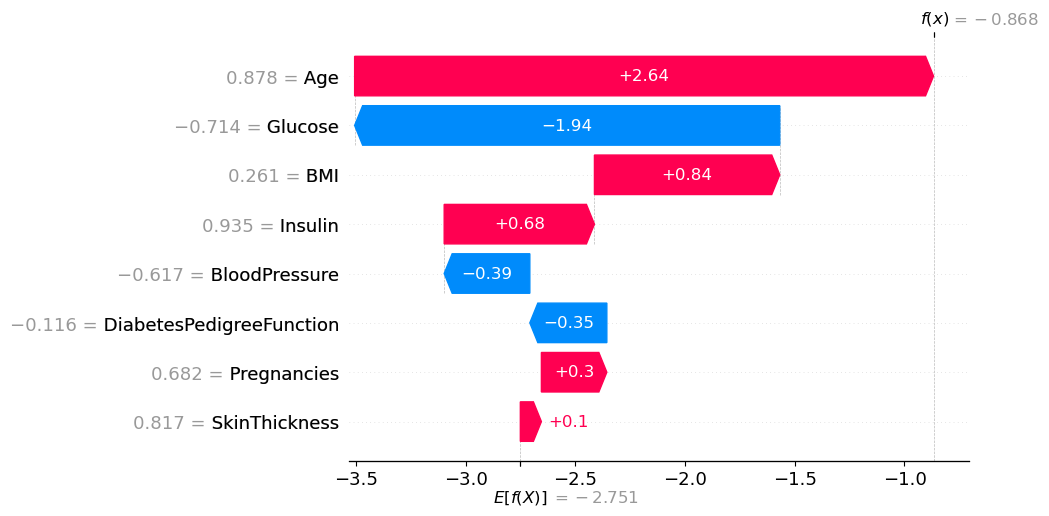

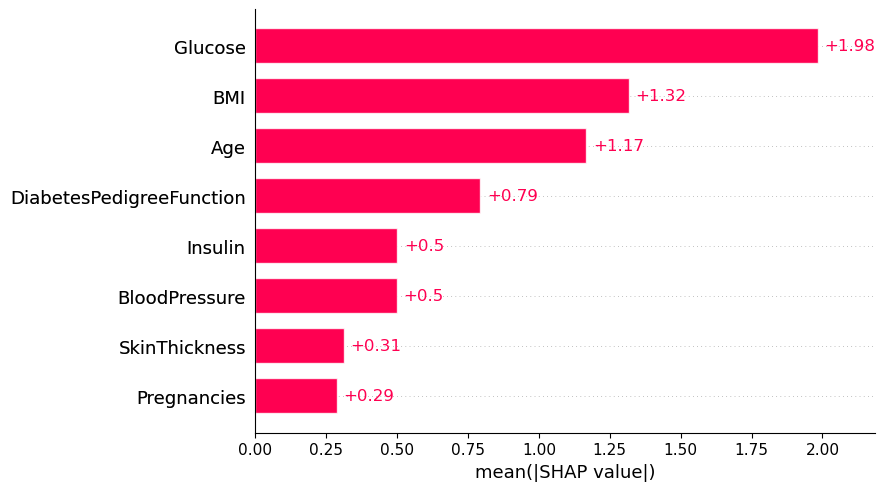

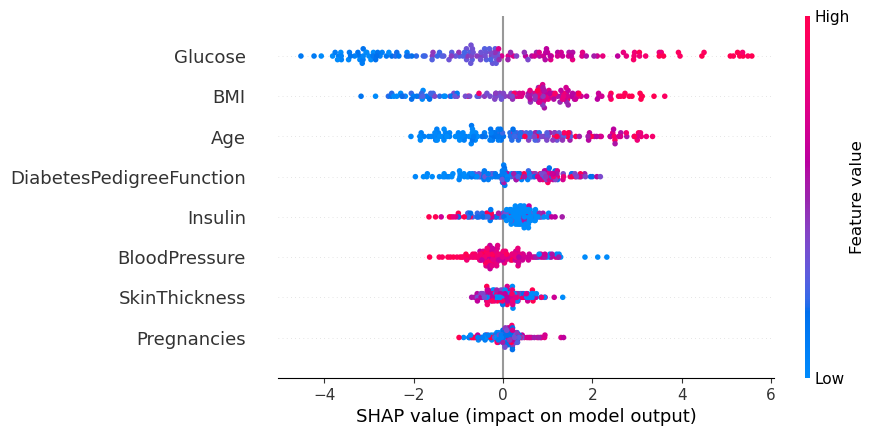

In [10]:
from xgboost import XGBClassifier

# Train XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_xgb = model_xgb.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb)

# SHAP
explainer_xgb = shap.Explainer(model_xgb, X_train_scaled)
shap_values_xgb = explainer_xgb(X_test_scaled)

# SHAP Visualizations
shap.initjs()
shap.plots.waterfall(shap_values_xgb[sample_index])
shap.plots.bar(shap_values_xgb)
shap.plots.beeswarm(shap_values_xgb)
shap.plots.force(shap_values_xgb[sample_index])

‚úÖ Accuracy: 0.747
üìà Sensitivity (Recall): 0.673
üìâ Specificity: 0.788


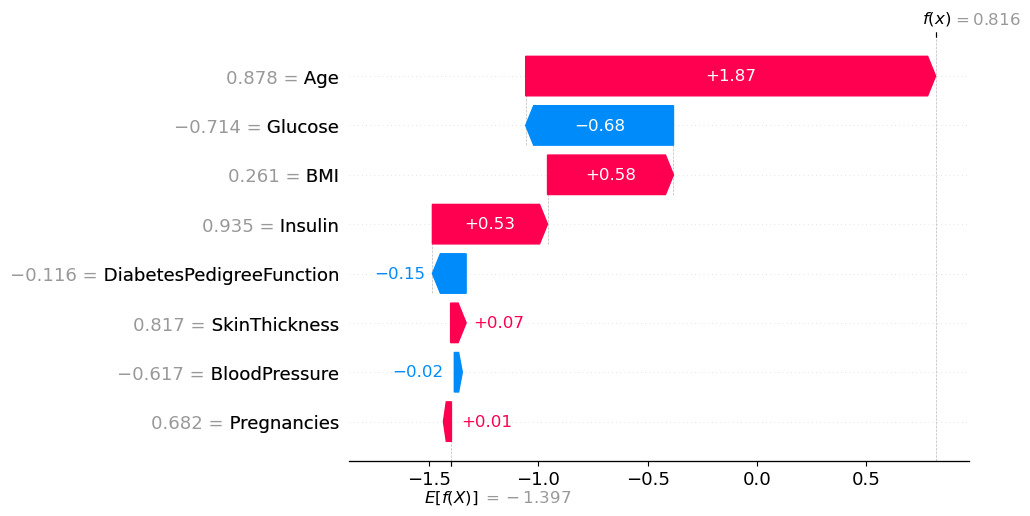

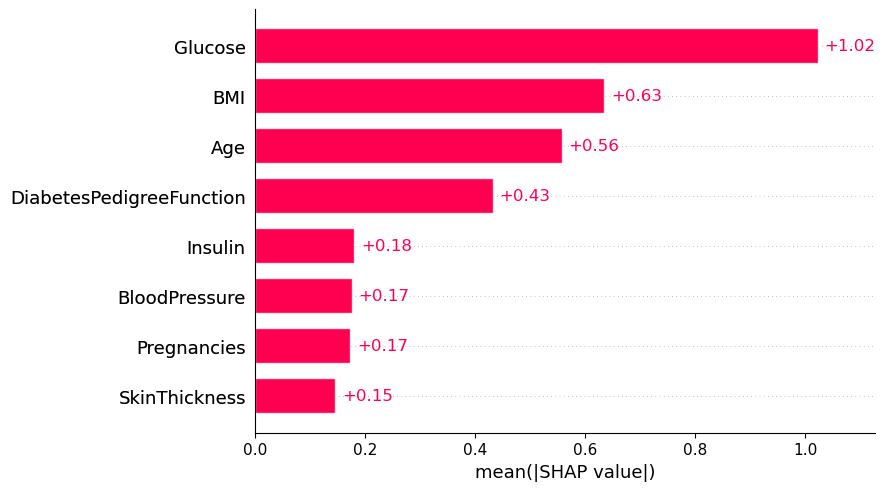

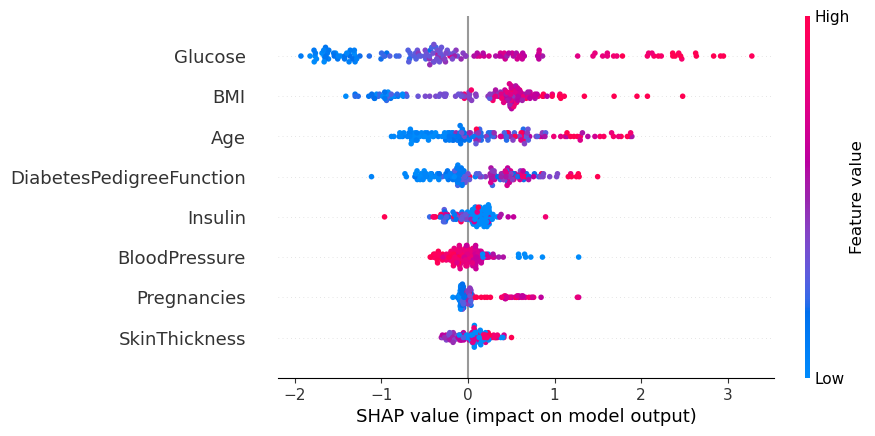

In [13]:
# ‚úÖ Import Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
import shap

# ‚úÖ Train model
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)

# ‚úÖ Predict and evaluate
y_pred_gb = model_gb.predict(X_test_scaled)
evaluate_model(y_test, y_pred_gb)

# ‚úÖ SHAP Explainer (disable additivity check for sklearn GB)
explainer_gb = shap.Explainer(model_gb, X_train_scaled)
shap_values_gb = explainer_gb(X_test_scaled, check_additivity=False)

# ‚úÖ SHAP Plots
sample_index = 0
shap.initjs()
shap.plots.waterfall(shap_values_gb[sample_index])
shap.plots.bar(shap_values_gb)
shap.plots.beeswarm(shap_values_gb)
shap.plots.force(shap_values_gb[0])


üìä Logistic Regression
Prediction: 0


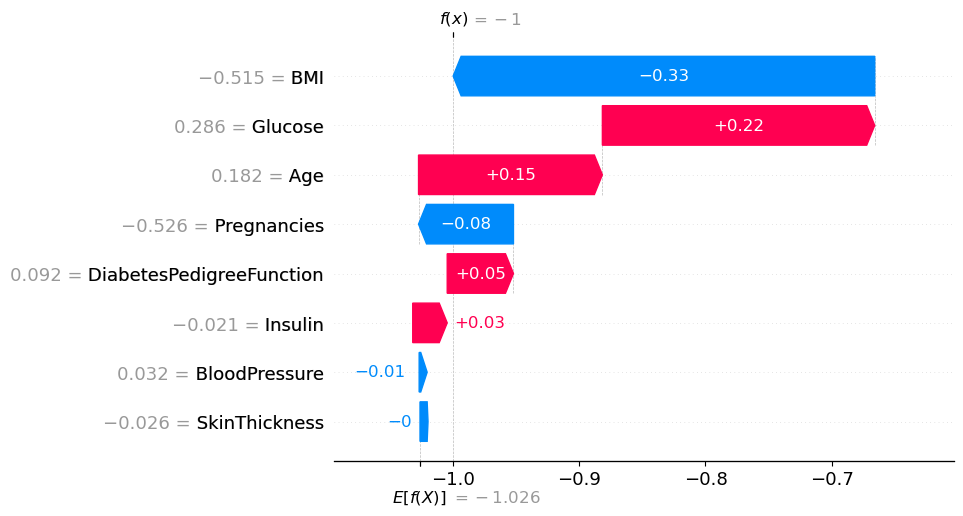

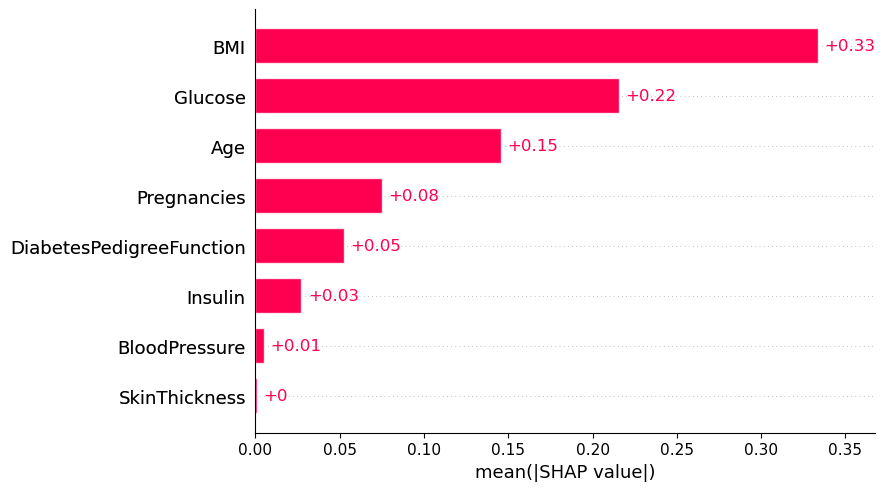

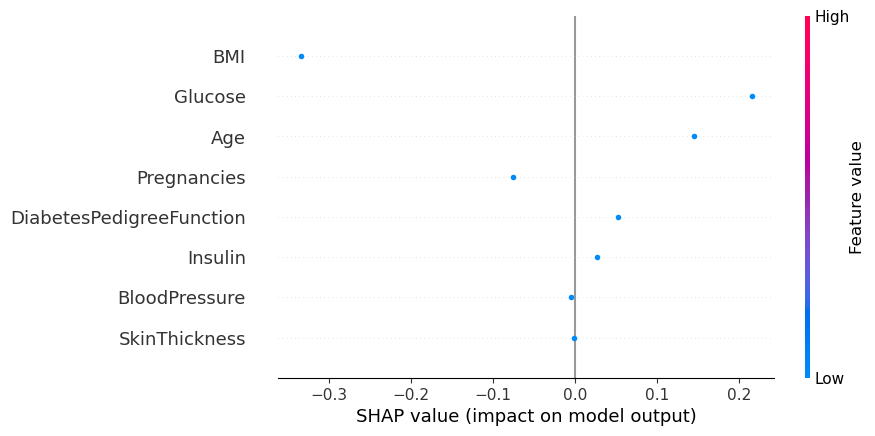

In [20]:

# ‚úÖ Custom input
sample_dict = {
    'Pregnancies': [2],
    'Glucose': [130],
    'BloodPressure': [70],
    'SkinThickness': [20],
    'Insulin': [79],
    'BMI': [28.0],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [35]
}
custom_input = pd.DataFrame(sample_dict)

# ‚úÖ Scale using training scaler
custom_input_scaled = pd.DataFrame(
    scaler.transform(custom_input),
    columns=custom_input.columns
)

# ‚úÖ SHAP Plots for Logistic Regression
print("\nüìä Logistic Regression")
pred_lr = model_lr.predict(custom_input_scaled)[0]
print(f"Prediction: {pred_lr}")
shap_values_lr = explainer_lr(custom_input_scaled)
shap.initjs()
shap.plots.waterfall(shap_values_lr[0])
shap.plots.bar(shap_values_lr)
shap.plots.beeswarm(shap_values_lr)
shap.plots.force(shap_values_lr[0])



üìä XGBoost
Prediction: 1


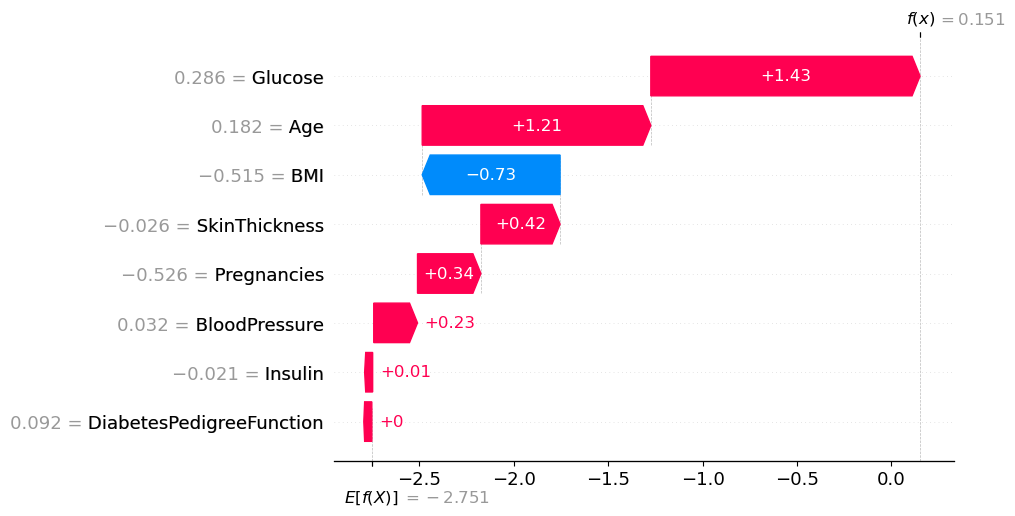

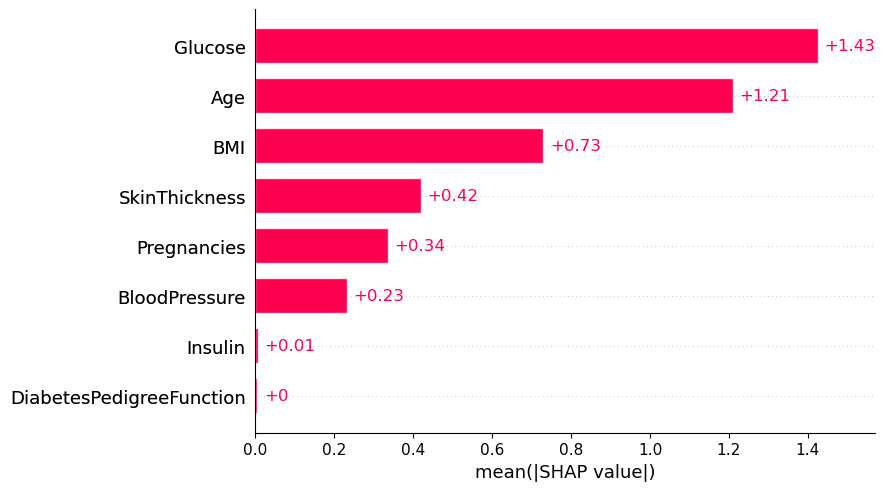

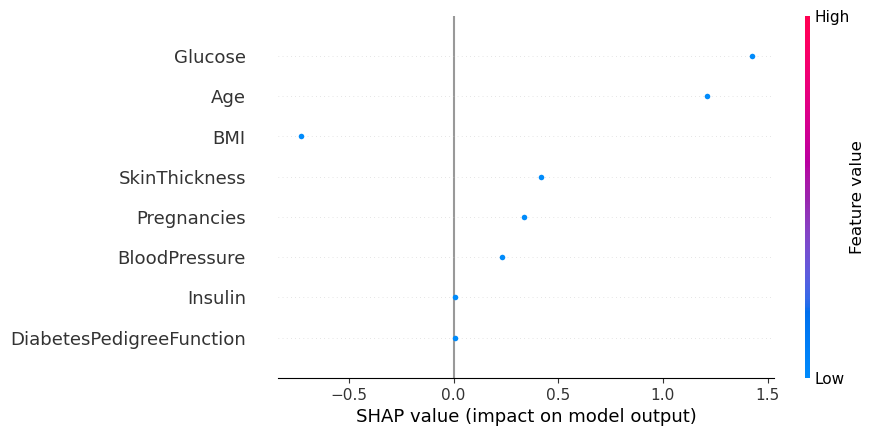

In [21]:
# ‚úÖ SHAP Plots for XGBoost
print("\nüìä XGBoost")
pred_xgb = model_xgb.predict(custom_input_scaled)[0]
print(f"Prediction: {pred_xgb}")
shap_values_xgb = explainer_xgb(custom_input_scaled)
shap.initjs()
shap.plots.waterfall(shap_values_xgb[0])
shap.plots.bar(shap_values_xgb)
shap.plots.beeswarm(shap_values_xgb)
shap.plots.force(shap_values_xgb[0])



üìä Gradient Boosting
Prediction: 0


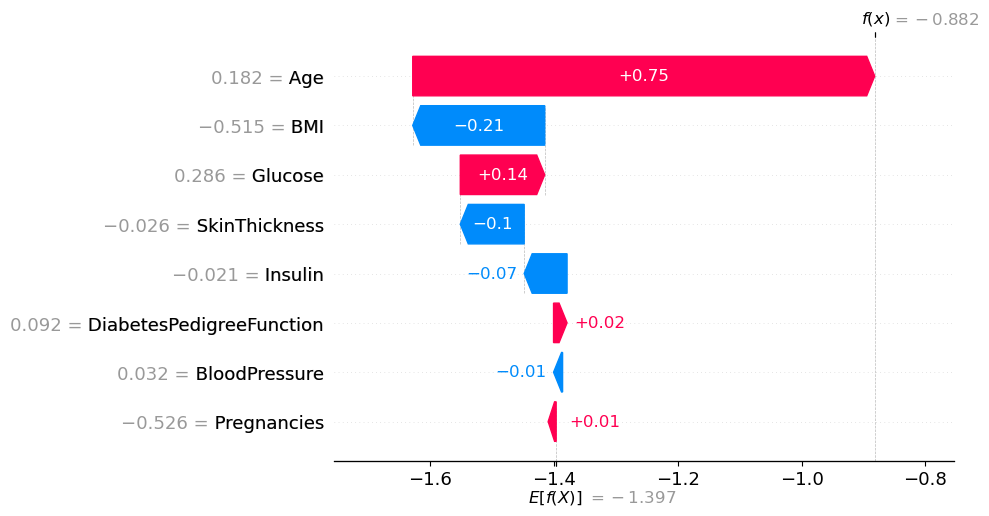

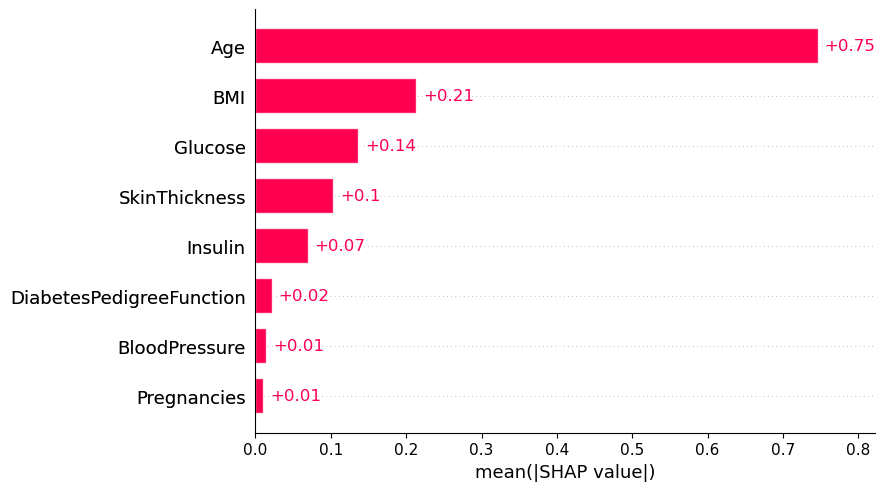

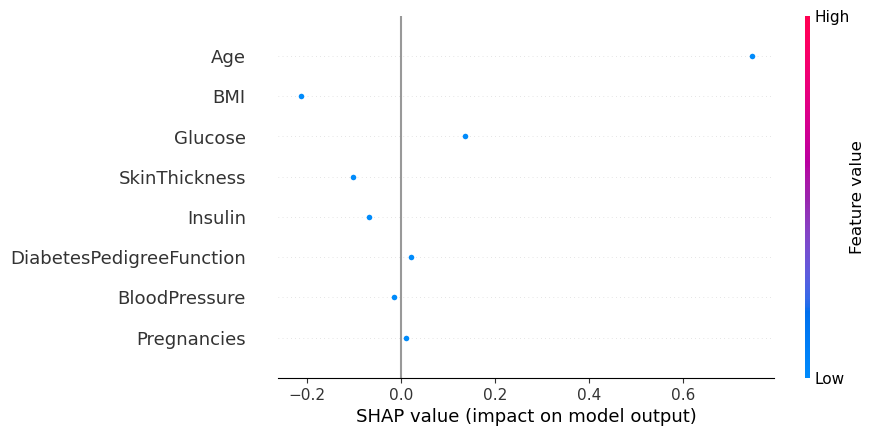

In [22]:
# ‚úÖ SHAP Plots for Gradient Boosting (sklearn)
print("\nüìä Gradient Boosting")
pred_gb = model_gb.predict(custom_input_scaled)[0]
print(f"Prediction: {pred_gb}")
shap_values_gb = explainer_gb(custom_input_scaled, check_additivity=False)
shap.initjs()
shap.plots.waterfall(shap_values_gb[0])
shap.plots.bar(shap_values_gb)
shap.plots.beeswarm(shap_values_gb)
shap.plots.force(shap_values_gb[0])
